In [1]:
import os
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

In [2]:
image_size = (256, 256)
batch_size = 32

In [3]:
train_path = "fresh-rotten/Train"
val_path = "fresh-rotten/Validation"
test_path = "fresh-rotten/Test"

In [4]:
train_dataset = image_dataset_from_directory(
    train_path,
    label_mode="int",         
    image_size=image_size,
    batch_size=batch_size,
)
# .map(lambda x: (x, custom_label_mapping(x.file_path)))

val_dataset = image_dataset_from_directory(
    val_path,
    label_mode="int",
    image_size=image_size,
    batch_size=batch_size,
)
# .map(lambda x: (x, custom_label_mapping(x.file_path)))

test_dataset = image_dataset_from_directory(
    test_path,
    label_mode="int",
    image_size=image_size,
    batch_size=batch_size,
)
# .map(lambda x: (x, custom_label_mapping(x.file_path)))

Found 4677 files belonging to 24 classes.
Found 1614 files belonging to 24 classes.
Found 1549 files belonging to 24 classes.


In [5]:
def custom_label_mapping(image, label):
    new_label = tf.where(label < 9, 0, 1)
    return image, new_label

train_dataset = train_dataset.map(custom_label_mapping)
val_dataset = val_dataset.map(custom_label_mapping)
test_dataset = test_dataset.map(custom_label_mapping)

In [6]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

In [7]:
def process_image(image, label):
    image = tf.cast(image, tf.float32) / 255.0  
    return image, label

train_dataset = train_dataset.map(lambda x, y : (data_augmentation(x, training=True), y)).map(process_image)
val_dataset = val_dataset.map(process_image)
test_dataset = test_dataset.map(process_image)

In [8]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15488\766329986.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


In [9]:
# def create_model():
#     model = models.Sequential([
#         layers.Input(shape=(256, 256, 3)),
#         layers.Rescaling(1/255.),
#         layers.Conv2D(32, (3, 3), activation='relu'),
#         layers.MaxPooling2D((2, 2)),
#         layers.Conv2D(64, (3, 3), activation='relu'),
#         layers.MaxPooling2D((2, 2)),
#         layers.Conv2D(128, (3, 3), activation='relu'),
#         layers.MaxPooling2D((2, 2)),
#         layers.Flatten(),
#         layers.Dense(256, activation='relu'),
#         layers.Dense(1, activation="sigmoid")
#     ])

#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss="binary_crossentropy", metrics=["accuracy"])
#     return model

In [10]:
model = models.Sequential([
    base_model,
    layers.Rescaling(1/255.),
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid")
])

model.compile(tf.keras.optimizers.Adam(learning_rate=1e-3), loss="binary_crossentropy", metrics=["accuracy"])

In [11]:
# model = create_model()

In [12]:
history = model.fit(train_dataset, epochs=20, validation_data=val_dataset)

Epoch 1/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 306s 2s/step - accuracy: 0.6139 - loss: 0.6477 - val_accuracy: 0.6945 - val_loss: 0.5177
Epoch 2/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 268s 2s/step - accuracy: 0.8019 - loss: 0.4751 - val_accuracy: 0.8333 - val_loss: 0.3825
Epoch 3/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.8954 - loss: 0.3324 - val_accuracy: 0.8482 - val_loss: 0.3303
Epoch 4/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 0.9065 - loss: 0.2710 - val_accuracy: 0.8507 - val_loss: 0.3144
Epoch 5/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.9118 - loss: 0.2517 - val_accuracy: 0.8550 - val_loss: 0.3069
Epoch 6/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.9167 - loss: 0.2275 - val_accuracy: 0.8662 - val_loss: 0.2875
Epoch 7/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.9179 - loss: 0.2222 - val_accuracy: 0.8730 - val_loss: 0.2738
Epoch 8/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 0.9240 - loss: 0.2097 - val_accu

In [13]:
val_loss, val_acc = model.evaluate(val_dataset)
tra_loss, tra_acc = model.evaluate(train_dataset)
test_loss, test_acc = model.evaluate(test_dataset)

print(f"Train Accuracy\t\t: {tra_acc * 100:.2f}% | Train Loss\t\t: {tra_loss}")
print(f"Validation Accuracy\t: {val_acc * 100:.2f}% | Validation Loss\t: {val_loss}")
print(f"Test Accuracy\t\t: {test_acc * 100:.2f}% | Test Loss \t\t: {test_loss}")

51/51 ━━━━━━━━━━━━━━━━━━━━ 38s 730ms/step - accuracy: 0.9107 - loss: 0.2161
147/147 ━━━━━━━━━━━━━━━━━━━━ 124s 833ms/step - accuracy: 0.9456 - loss: 0.1395
49/49 ━━━━━━━━━━━━━━━━━━━━ 42s 772ms/step - accuracy: 0.8790 - loss: 0.2975
Train Accuracy		: 95.04% | Train Loss		: 0.1344812959432602
Validation Accuracy	: 90.40% | Validation Loss	: 0.2258681058883667
Test Accuracy		: 88.70% | Test Loss 		: 0.28562793135643005


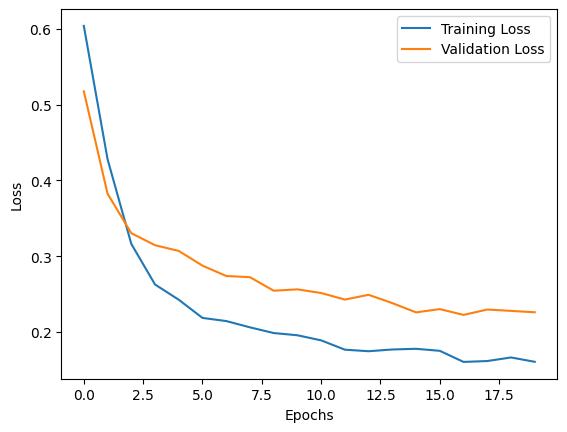

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
model.save("fresh-rotten-MobileNetV2.h5")

In [16]:
model.save("fresh-rotten-MobileNetV2.keras")